In [1]:
# Package imporation 

from google.colab import files 
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
# Data imporation 

df=files.upload()
df=pd.read_csv(io.StringIO(df['results.csv'].decode('utf-8')))
df.head()

Saving results.csv to results.csv


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


##  Impact of hosting a major tournament helps a country's chances in winning the most number of matches within the said tournament

In [ ]:
# Information about the tournament column
df['tournament'].describe()

count        42082
unique         112
top       Friendly
freq         17189
Name: tournament, dtype: object

In [ ]:
# Total matches played for each tournement 
df1=df.groupby(['tournament']).count()
df1['Total matches palyed']=df1['date']
df1=df1['Total matches palyed']
df1=pd.DataFrame(df1)
print(df1)

                                 Total matches palyed
tournament                                           
ABCS Tournament                                    20
AFC Asian Cup                                     370
AFC Asian Cup qualification                       724
AFC Challenge Cup                                 100
AFC Challenge Cup qualification                    92
...                                               ...
Viva World Cup                                     56
WAFF Championship                                  97
West African Cup                                   54
Windward Islands Tournament                       101
World Unity Cup                                     4

[112 rows x 1 columns]


In [ ]:
#Selecting only matches played with the host nation of a tournment 
df2=df.set_index('neutral')
df2=df2.loc[False]
df2=df2.reset_index()
df2=df2[df2['home_team']==df2['country']]

# Selecting only matches won by the host country 
# The host nation is known as the home team in sports
df3=df2[df2['home_score']>df2['away_score']]

#Grouping the matches won by the host country according to the tournament
df4=df3.groupby(['tournament']).count()
df4['Total matches won']=df4['date']
df4=df4['Total matches won']
df4=pd.DataFrame(df4)
print(df4)

                                 Total matches won
tournament                                        
ABCS Tournament                                  7
AFC Asian Cup                                   43
AFC Asian Cup qualification                    279
AFC Challenge Cup                                8
AFC Challenge Cup qualification                 28
...                                            ...
VFF Cup                                          1
Vietnam Independence Cup                        19
WAFF Championship                               17
West African Cup                                10
Windward Islands Tournament                     29

[102 rows x 1 columns]


In [ ]:
#creating a data frame to calculate the winning percantage
#Empty data columns are filled with 0
#If not empty data columns will be filled by the python automatically by pushing the cells with data to the empty columns
#As the irrlevant data cells are present in the data rows the calucation will be wrong

df5=pd.concat([df1,df4],axis=1)
df5=df5.fillna(0)
df5['winning percentage']=(100*df5['Total matches won']/df5['Total matches palyed']).round(2)
df5.head()

,Total matches palyed,Total matches won,winning percentage
ABCS Tournament,20,7.0,35.00
AFC Asian Cup,370,43.0,11.62
AFC Asian Cup qualification,724,279.0,38.54
AFC Challenge Cup,100,8.0,8.00
AFC Challenge Cup qualification,92,28.0,30.43


In [ ]:
#selecting tournaments with more than 50% chance of host country winning 
df6=df5[df5['winning percentage'] > 50]
df6=df6.reset_index()
df6=df6.rename(columns={'index':'Tournament'})
df6.head(15)

,Tournament,Total matches palyed,Total matches won,winning percentage
0,African Cup of Nations qualification,1719,920.0,53.52
1,Atlantic Cup,11,7.0,63.64
2,Balkan Cup,87,44.0,50.57
3,Copa Carlos Dittborn,16,9.0,56.25
4,Copa Chevallier Boutell,29,15.0,51.72
5,Copa Newton,26,14.0,53.85
6,Copa Premio Honor Argentino,12,7.0,58.33
7,Copa Premio Honor Uruguayo,15,8.0,53.33
8,Copa del Pacífico,19,10.0,52.63
9,International Cup,127,69.0,54.33


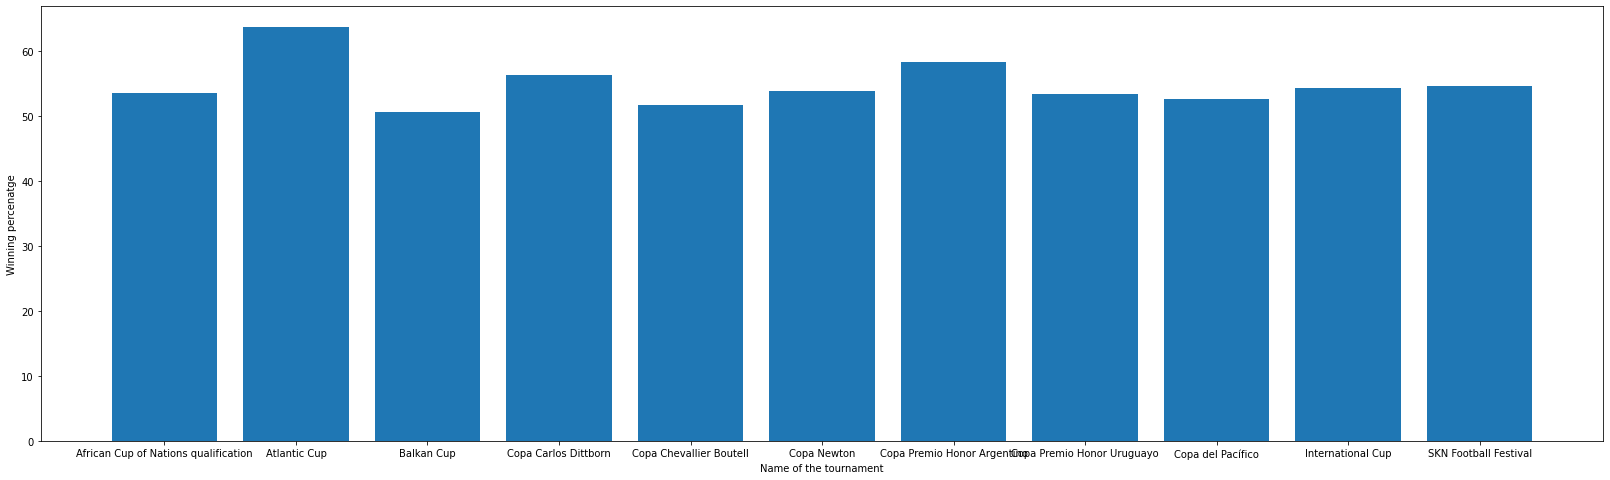

In [ ]:
#Plotting the bar chart
plt.figure(figsize=(28,8))
plt.bar(df6['Tournament'],df6['winning percentage'])
plt.xlabel('Name of the tournament')
plt.ylabel('Winning percenatge')
plt.show()

#####Only 11 out of 112 tournaments will give the host country to win more than 50% proability . The highest is for the Atalntic cup which is 63.22%

## most successful team of all time and  specific period(era) that was dominated by teams

In [ ]:
#Select matches with a clear winner 
df1=df[df['home_score']!=df['away_score']]
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False


In [ ]:
#creating a column to find the winner of a played match 
df1[9]=df1['home_team']
df1.loc[df1['home_score']<df1['away_score'],9]=df1['away_team']
df1=df1.rename(columns={9:'winner'})
df1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,England


In [ ]:
#group the winner by the country 
df2=df1.groupby(['winner']).count()
df2['Total matches won']=df2['date']
df2=df2['Total matches won']
df2=pd.DataFrame(df2)

#find top 10 countries with mots wins
df2=df2.sort_values(['Total matches won'],ascending=False)
df2.head(10)

,Total matches won
winner,
Brazil,629
England,580
Germany,560
Argentina,529
Sweden,506
South Korea,455
Mexico,443
Hungary,442
Italy,431


In [ ]:
#Calculating the total matches played by each nation
#Counted how many times each team appears times twams appear as away and home teams
#This is calculated separetly as data fraems 
#Later two data frames are combines to find the total matches played
dft=df.copy()
dft1=dft.groupby(['home_team']).size()
dft1=pd.DataFrame(dft1)
dft1=dft1.rename(columns={0:'home'})
dft2=dft.groupby(['away_team']).size()
dft2=pd.DataFrame(dft2)
dft2=dft2.rename(columns={0:'away'})
dft=pd.concat([dft1,dft2],axis=1)
dft=dft.fillna(0)
dft=dft.astype(int)
dft['Total matches played']=dft['away']+dft['home']
dft=pd.DataFrame(dft['Total matches played'])
dft=dft.sort_values(['Total matches played'],ascending=False)
dft.head(10)


,Total matches played
Sweden,1030
England,1020
Brazil,985
Argentina,984
Germany,961
Hungary,943
Uruguay,889
Mexico,875
South Korea,865
France,851


In [ ]:
#Finding teams with best winning percantge
dfc=pd.concat([df2, dft],axis=1)
dfc=dfc.fillna(0)
dfc=dfc.astype(int)
dfc['Winning percentage']=((dfc['Total matches won']/dfc['Total matches played'])*100).round(2)
dfc=dfc.sort_values(['Winning percentage'], ascending=False)
dfc.head(10)

,Total matches won,Total matches played,Winning percentage
Asturias,1,1,100.00
Surrey,1,1,100.00
Canary Islands,3,4,75.00
Yorkshire,5,7,71.43
Padania,29,43,67.44
Jersey,55,82,67.07
Parishes of Jersey,2,3,66.67
County of Nice,6,9,66.67
Basque Country,37,57,64.91
Brazil,629,985,63.86


In [ ]:

#df3['date']=datetime.datetime.strptime(df1['date'], "%d/%m/%Y").strftime("%Y-%m-%d")
#df3['date']=df3[df3['date'] < '1900-01-01']
print(df1)

             date      home_team  ... neutral           winner
1      1873-03-08        England  ...   False          England
2      1874-03-07       Scotland  ...   False         Scotland
4      1876-03-04       Scotland  ...   False         Scotland
5      1876-03-25       Scotland  ...   False         Scotland
6      1877-03-03        England  ...   False         Scotland
...           ...            ...  ...     ...              ...
42077   3/31/2021        Andorra  ...   False          Hungary
42078   3/31/2021     San Marino  ...   False          Albania
42079   3/31/2021        Armenia  ...   False          Armenia
42080   3/31/2021        Germany  ...   False  North Macedonia
42081   3/31/2021  Liechtenstein  ...   False          Iceland

[32382 rows x 10 columns]


The data set is divided into 4 main eras. The first one is the 19th century. At that time the world was experiencing the industrialization which gave birth to the industrial nation in Europe and America. Large number of empires are present who are ready to fight but still holding off. As there are no major wars this era was peaceful but same time fragile. Since the sporting records are not well developed in this era, mtaches from very few develped nations are present . Most of the data contains mtaches played between Home nations (British Isles) as the British Isles has the required facilities to record sports as the world leader. 

Next  is the prewar part of the 20th century that contains matches played till end if 2nd world war. This time was scattered with two world wars and rise of ultra-nationalistic and ideological governments. With the war the economic and social conditions are vastly different from the 19th century. Many nations who competed in this era competed as empires or dominion colonies. Also, the sport was using same technology they used in previous era.

Next is the post war 20th century. After the World War 2 , all the large empires are declined politically and economically. As colonies gain independence large number of new nations were created which increased the matches drastically. Also, to prevent another world war nations started to collaborate and build economic alliances with each other, which also gave birth to many competitions. This initiative was led by the two new superpowers of USA and USSR, who also started the cold war.

Till 1991 the cold war was active and even after that post war social and economic conditions are mainly unchanged. Sports were also a battleground for the cold war, but still European dominance was present. However South America was able to strengthen their power in football in this era. After the cold war many new nations were created and most of them were able to enter the world cup and even were able to reach finals (Croatia was able to reach for finals in 2018).

In 21st century Asia began to rise. They have started this from the latter part of 20th century but much more evident in this era. More Asian nations began to participate in sporting events, but they couldn't create a strong impact on football , even though nations like China, Japan and South Korea is already leading in many Olympic level sports.




In [ ]:
#Total matches won
#era of 19th centuray
#select dates before 1900/01/01
df21=df1.copy()
df21['date']=pd.to_datetime(df1['date'])
df21=df21.loc[df21['date']<'1900-01-01']

#group the countries 
#find top 10 countries with mots wins
df21=df21.groupby('winner').count()
df21['Total matches won']=df21['date']
df21=df21['Total matches won']
df21=pd.DataFrame(df21)
df21=df21.sort_values(['Total matches won'],ascending=False)
df21.head(10)

,Total matches won
winner,
Scotland,50
England,43
Wales,11
Northern Ireland,5
Canada,1
United States,1


In [ ]:
#19th century data set selcetd
df21t=df.copy()
df21t['date']=pd.to_datetime(df['date'])
df21t=df21t.loc[df21t['date']<'1900-01-01']

#finding the number of matches palyed in the era
dft=df21t
dft1=dft.groupby(['home_team']).size()
dft1=pd.DataFrame(dft1)
dft1=dft1.rename(columns={0:'home'})
dft2=dft.groupby(['away_team']).size()
dft2=pd.DataFrame(dft2)
dft2=dft2.rename(columns={0:'away'})
dft=pd.concat([dft1,dft2],axis=1)
dft=dft.fillna(0)
dft=dft.astype(int)
dft['Total matches played']=dft['away']+dft['home']
dft=pd.DataFrame(dft['Total matches played'])
dft=dft.sort_values(['Total matches played'],ascending=False)

#finding most sucessful teams by winning percenatge
dfc=pd.concat([df21, dft],axis=1)
dfc=dfc.fillna(0)
dfc=dfc.astype(int)
dfc['Winning percentage']=((dfc['Total matches won']/dfc['Total matches played'])*100).round(2)
dfc=dfc.sort_values(['Winning percentage'], ascending=False)
dfc.head(10)
#dft.head(10)

,Total matches won,Total matches played,Winning percentage
winner,,,
Scotland,50,69,72.46
England,43,67,64.18
United States,1,2,50.00
Canada,1,3,33.33
Wales,11,62,17.74
Northern Ireland,5,51,9.80


In [ ]:
#era of pre war 20th centuray
#select dates before 1945/09/30 (end of second world war)
df21=df1.copy()
df21['date']=pd.to_datetime(df1['date'])
df21=df21.loc[df21['date']<'1945-09-30']

#group the countries 
#find top 10 countries with most wins
df21=df21.groupby('winner').count()
df21['Total matches won']=df21['date']
df21=df21['Total matches won']
df21=pd.DataFrame(df21)
df21=df21.sort_values(['Total matches won'],ascending=False)
df21.head(10)

,Total matches won
winner,
England,138
Argentina,131
Scotland,120
Sweden,115
Hungary,114
Germany,96
Austria,92
Uruguay,87
Italy,75


In [ ]:
#20th century pre war data set selcetd
df21t=df.copy()
df21t['date']=pd.to_datetime(df['date'])
df21t=df21t.loc[df21t['date']<'1945-09-30']

#finding the number of matches palyed in the era
dft=df21t
dft1=dft.groupby(['home_team']).size()
dft1=pd.DataFrame(dft1)
dft1=dft1.rename(columns={0:'home'})
dft2=dft.groupby(['away_team']).size()
dft2=pd.DataFrame(dft2)
dft2=dft2.rename(columns={0:'away'})
dft=pd.concat([dft1,dft2],axis=1)
dft=dft.fillna(0)
dft=dft.astype(int)
dft['Total matches played']=dft['away']+dft['home']
dft=pd.DataFrame(dft['Total matches played'])
dft=dft.sort_values(['Total matches played'],ascending=False)

#finding most sucessful teams by winning percenatge
dfc=pd.concat([df21, dft],axis=1)
dfc=dfc.fillna(0)
dfc=dfc.astype(int)
dfc['Winning percentage']=((dfc['Total matches won']/dfc['Total matches played'])*100).round(2)
dfc=dfc.sort_values(['Winning percentage'], ascending=False)
dfc.head(10)
#dft.head(10)

,Total matches won,Total matches played,Winning percentage
Asturias,1,1,100.00
Grenada,2,2,100.00
Iran,1,1,100.00
Ukraine,1,1,100.00
Dominica,4,5,80.00
Costa Rica,9,12,75.00
Basque Country,17,23,73.91
China PR,10,14,71.43
Uganda,13,20,65.00
Scotland,120,191,62.83


In [ ]:
#era of post war 20th centuray
#select dates before 2000-01-01
df21=df1.copy()
df21['date']=pd.to_datetime(df1['date'])
df21=df21.loc[df21['date']<'2000-01-01']

#group the countries 
#find top 10 countries with mots wins
df21=df21.groupby('winner').count()
df21['Total matches won']=df21['date']
df21=df21['Total matches won']
df21=pd.DataFrame(df21)
df21=df21.sort_values(['Total matches won'],ascending=False)
df21.head(10)

,Total matches won
winner,
Brazil,435
England,434
Germany,387
Sweden,375
Argentina,373
Hungary,357
Scotland,302
South Korea,297
Italy,291


In [ ]:
#20th century post war data set selcetd
df21t=df.copy()
df21t['date']=pd.to_datetime(df['date'])
df21t=df21t.loc[df21t['date']<'2000-01-01']

#finding the number of matches palyed in the era
dft=df21t
dft1=dft.groupby(['home_team']).size()
dft1=pd.DataFrame(dft1)
dft1=dft1.rename(columns={0:'home'})
dft2=dft.groupby(['away_team']).size()
dft2=pd.DataFrame(dft2)
dft2=dft2.rename(columns={0:'away'})
dft=pd.concat([dft1,dft2],axis=1)
dft=dft.fillna(0)
dft=dft.astype(int)
dft['Total matches played']=dft['away']+dft['home']
dft=pd.DataFrame(dft['Total matches played'])
dft=dft.sort_values(['Total matches played'],ascending=False)

#finding most sucessful teams by winning percenatge
dfc=pd.concat([df21, dft],axis=1)
dfc=dfc.fillna(0)
dfc=dfc.astype(int)
dfc['Winning percentage']=((dfc['Total matches won']/dfc['Total matches played'])*100).round(2)
dfc=dfc.sort_values(['Winning percentage'], ascending=False)
dfc.head(10)
#dft.head(10)

,Total matches won,Total matches played,Winning percentage
Canary Islands,2,2,100.00
Asturias,1,1,100.00
Jersey,21,30,70.00
Basque Country,24,35,68.57
Brazil,435,688,63.23
Gotland,3,5,60.00
Czech Republic,46,77,59.74
Tahiti,78,133,58.65
Germany,387,674,57.42
England,434,772,56.22


In [ ]:
#era of 21stcentuary
#select dates on or after 2000-01-01
df21=df1.copy()
df21['date']=pd.to_datetime(df1['date'])
df21=df21.loc[df21['date']>='2000-01-01']

#group the countries 
#find top 10 countries with mots wins
df21=df21.groupby('winner').count()
df21['Total matches won']=df21['date']
df21=df21['Total matches won']
df21=pd.DataFrame(df21)
df21=df21.sort_values(['Total matches won'],ascending=False)
df21.head(10)

,Total matches won
winner,
Mexico,201
Brazil,194
Spain,190
United States,181
Japan,177
France,175
Germany,173
Iran,170
Saudi Arabia,163


In [ ]:
#21st century post war data set selcetd
df21t=df.copy()
df21t['date']=pd.to_datetime(df['date'])
df21t=df21t.loc[df21t['date']>='2000-01-01']

#finding the number of matches palyed in the era
dft=df21t
dft1=dft.groupby(['home_team']).size()
dft1=pd.DataFrame(dft1)
dft1=dft1.rename(columns={0:'home'})
dft2=dft.groupby(['away_team']).size()
dft2=pd.DataFrame(dft2)
dft2=dft2.rename(columns={0:'away'})
dft=pd.concat([dft1,dft2],axis=1)
dft=dft.fillna(0)
dft=dft.astype(int)
dft['Total matches played']=dft['away']+dft['home']
dft=pd.DataFrame(dft['Total matches played'])
dft=dft.sort_values(['Total matches played'],ascending=False)

#finding most sucessful teams by winning percenatge
dfc=pd.concat([df21, dft],axis=1)
dfc=dfc.fillna(0)
dfc=dfc.astype(int)
dfc['Winning percentage']=((dfc['Total matches won']/dfc['Total matches played'])*100).round(2)
dfc=dfc.sort_values(['Winning percentage'], ascending=False)
dfc.head(10)
#dft.head(10)

,Total matches won,Total matches played,Winning percentage
Surrey,1,1,100.00
Andalusia,7,9,77.78
Yorkshire,5,7,71.43
Kernow,5,7,71.43
Spain,190,273,69.60
Padania,29,43,67.44
Parishes of Jersey,2,3,66.67
Isle of Man,24,36,66.67
County of Nice,6,9,66.67
Jersey,34,52,65.38


### winning predictor

In [ ]:
#Seleceting the FIFA world cup matches
#All other matches will be dicareded as only FIFA matches are required
dfw=df.loc[df['tournament']=='FIFA World Cup']
dfw.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1315,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1316,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1317,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1318,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1319,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [ ]:
#Selecet matches with a clear winner
#Others are discared as mtaches without a winning side cannot be used to predeict a winner
dfw=dfw[dfw['home_score']!=dfw['away_score']]
dfw[9]=dfw['home_team']
dfw.loc[dfw['away_score']>dfw['home_score'],9]=dfw['away_team']
dfw=dfw.rename(columns={9:'winner'})
dfw.head(10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1315,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States
1316,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
1317,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia
1318,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania
1319,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
1320,7/16/1930,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,Chile
1321,7/17/1930,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia
1322,7/17/1930,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States
1324,7/18/1930,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,Uruguay
1325,7/19/1930,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,Argentina


In [ ]:
#Selecet the best 5 teams (teams with most wins)
dfwc=dfw.groupby('winner').count()
dfwc['Matches won']=dfwc['date']
dfwc=dfwc['Matches won']
dfwc=pd.DataFrame(dfwc)
dfwc=dfwc.sort_values(['Matches won'], ascending=False)
dfwc.head()

,Matches won
winner,
Brazil,73
Germany,67
Italy,45
Argentina,43
France,34


In [ ]:
#creating the train set with FIFA world cups till 2010

dfw_train=dfw.copy()
dfw_train['date']=pd.to_datetime(dfw['date'])
dfw_train=dfw_train.loc[dfw_train['date']<'2010-01-01']
dfw_train=dfw_train[['date','home_team','away_team','winner']]
dfw_train=dfw_train.set_index('date')
dfw_train.tail()



,home_team,away_team,winner
date,,,
2006-06-30,Italy,Ukraine,Italy
2006-07-01,Brazil,France,France
2006-07-04,Germany,Italy,Italy
2006-07-05,Portugal,France,France
2006-07-08,Germany,Portugal,Germany


In [ ]:
#creating cross validation set
#using data of 2010,2014 and 2018 tournaments

dfw_cv=dfw.copy()
dfw_cv['date']=pd.to_datetime(dfw['date'])
dfw_cv=dfw_cv.loc[dfw_cv['date']>'2010-01-01']
dfw_cv=dfw_cv[['date','home_team','away_team','winner']]
dfw_cv=dfw_cv.set_index('date')
dfw_cv.head()


,home_team,away_team,winner
date,,,
2010-06-12,Argentina,Nigeria,Argentina
2010-06-12,South Korea,Greece,South Korea
2010-06-13,Algeria,Slovenia,Slovenia
2010-06-13,Germany,Australia,Germany
2010-06-13,Serbia,Ghana,Ghana


In [ ]:
#Label encorder
#SVC
lab=LabelEncoder()
X=dfw_train.drop(['winner'],1)

X['away_team']=lab.fit_transform(X['away_team'])
X['home_team']=lab.fit_transform(X['home_team'])
X=np.array(X)

Y=dfw_train['winner']
Y=lab.fit_transform(Y)

rbf_svr=SVC(kernel='linear',C=0.1,gamma=1000)
rbf_svr.fit(X,Y)

Xt=dfw_cv.drop(['winner'],1)
Xt['away_team']=lab.fit_transform(Xt['away_team'])
Xt['home_team']=lab.fit_transform(Xt['home_team'])
Xt=np.array(Xt)

Yt=dfw_cv['winner']
Yt=lab.fit_transform(Yt)

Y_pred=rbf_svr.predict(Xt)
MSE=mean_absolute_error(Yt,Y_pred)
print('Mean Absloute error:',MSE)


Mean Absloute error: 9.246666666666666


In [ ]:
#Label encorder
#Logsitic regression
lab=LabelEncoder()
X=dfw_train.drop(['winner'],1)

X['away_team']=lab.fit_transform(X['away_team'])
X['home_team']=lab.fit_transform(X['home_team'])
X=np.array(X)

Y=dfw_train['winner']
Y=lab.fit_transform(Y)

logreg = LogisticRegression()
logreg.fit(X,Y)

Xt=dfw_cv.drop(['winner'],1)
Xt['away_team']=lab.fit_transform(Xt['away_team'])
Xt['home_team']=lab.fit_transform(Xt['home_team'])
Xt=np.array(Xt)

Yt=dfw_cv['winner']
Yt=lab.fit_transform(Yt)

Y_pred=logreg.predict(Xt)
MSE=mean_absolute_error(Yt,Y_pred)
print('Mean Absloute error:',MSE)

Mean Absloute error: 10.58


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Dividing data randomly
dfw_data=dfw[['away_team','home_team','winner']]
enc=preprocessing.OneHotEncoder()
ore=preprocessing.OrdinalEncoder()
X=enc.fit_transform(dfw_data.drop(['winner'],1))
Y=ore.fit_transform(dfw_data[['winner']])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
logreg.fit(X_train,y_train)

Y_pred=logreg.predict(X_test)
MSE=mean_absolute_error(y_test,Y_pred)
print('Mean Absloute error:',MSE)
#dfw_data.head()

Mean Absloute error: 6.943262411347518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Divding data arbiterly
dfw_data=dfw[['away_team','home_team','winner']]
enc=preprocessing.OneHotEncoder(handle_unknown='ignore')
ore=preprocessing.OrdinalEncoder()
logreg = LogisticRegression()
X=enc.fit(dfw_data.drop(['winner'],1))
Y=ore.fit(dfw_data[['winner']])
X_train=enc.transform(dfw_train.drop(['winner'],1))
Y_train=ore.transform(dfw_train[['winner']])
logreg.fit(X_train,Y_train)

X_test=enc.transform(dfw_cv.drop(['winner'],1))
Y_test=ore.transform(dfw_cv[['winner']])
Y_pred=logreg.predict(X_test)
MSE=mean_absolute_error(Y_test,Y_pred)
print('Mean Absloute error:',MSE)
#dfw_data.head()

Mean Absloute error: 8.14


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#creating 2022 FIFA matches with a win by repacing Sudi Arabia with Qutar
dft=dfw_cv.reset_index()
dft=dft.loc[dft['date']>'2017-12-31']
dft=dft.replace('Saudi Arabia','Qutar')
dft=dft.drop(['date'],1)

#Encoding data
dfw_data=dfw[['away_team','home_team','winner']]
data=pd.concat([dfw_data,dft])
enc=preprocessing.OneHotEncoder(handle_unknown='ignore')
ore=preprocessing.OrdinalEncoder()
logreg = LogisticRegression()
X=enc.fit(data.drop(['winner'],1))
Y=ore.fit(data[['winner']])

#Creating varibles
X_train=enc.transform(dfw_cv.drop(['winner'],1))
Y_train=ore.transform(dfw_cv[['winner']])
logreg.fit(X_train,Y_train)
X_test=enc.transform(dft.drop(['winner'],1))
Y_pred=logreg.predict(X_test)

#creating the most 5 sucessful team of the tournament
Y_list=ore.inverse_transform(Y_pred.reshape(-1,1))
Y_list=pd.DataFrame(Y_list)
Y_list['wins']=[1]*len(Y_list)
Y_list=Y_list.rename(columns={0:"country"})
Y_list=Y_list.groupby('country').count()
Y_list=Y_list.sort_values('wins',ascending=False)
Y_list.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,wins
country,
France,6
Belgium,6
Uruguay,4
Brazil,4
Colombia,4


Till 2010 large number of nations were able to debut in each world cup and the participating nations in the world cup differed vastly for each world cup (Large portion of the teams competed in a world cup will not be able to compete in the next one due to inability to get qualified). But from the 2010 world cup only 4 nations were able to debut in the world cup for 2010, 2014, 2018 world cups and the competing nations remained almost unchanged. Also, in this era number of teams remained at 32 and the qualifications from each continent changed marginally.

For the 2022 FIFA world cup only Qatar was able to qualify as the host. Since the continental qualifications are largely unchanged an Asian nation who competed in 2018 world cup might not be able to qualify for the world cup. From the Asian nations Saudi Arabia has the lowest chance to qualify as they were team with second lowest world ranking in the competition and other Asian nations had much higher ranking and still do (Qatar is 58 and Saudi Arabia is 65 is latest FIFA rankings). 

Also, Qatar and Saudi Arabia is similar in many in economically and socially so Saudi Arabia has a very small chance of selecting when Qatar is already selected from the tournament (Most of the Asian nations in FIFA world cup are selected from the continental qualifications. Rarely Japan can directly qualify).The Qatar team has less chance to proceed beyond group stage as nations beyond group stage are veteran FIFA playing nation.

 They might be dropped from the game in group stage just like Saudi Arabia.
Additionally, when winning predictions are checked Belgium and France have same number of winnings in 2022 world cup. Currently they are world number 1 and 2 respectively. If the champions curse (The winner of world cup will be not able qualify for the next world cup due to their inability to qualify. this has happened in all the world cups from 2006) is not present the France will have a good chance of winning the world cup.


In [ ]:
#Creating the first 4 matches aginst England
#Coniders both instances England being home and away
teams=['Brazil','France','Germany','Uruguay']
ds1=pd.DataFrame({'home_team':teams,'away_team':'England'})
ds2=pd.DataFrame({'home_team':'England','away_team':teams})
ds=pd.concat([ds1,ds2])

#Encoding data
dfw_data=dfw[['away_team','home_team','winner']]
enc=preprocessing.OneHotEncoder(handle_unknown='ignore')
ore=preprocessing.OrdinalEncoder()
logreg = LogisticRegression()
X=enc.fit(dfw_data.drop(['winner'],1))
Y=ore.fit(dfw_data[['winner']])

#Creating varibles
X_train=enc.transform(dfw_cv.drop(['winner'],1))
Y_train=ore.transform(dfw_cv[['winner']])
logreg.fit(X_train,Y_train)
X_test=enc.transform(ds)
Y_pred=logreg.predict(X_test)

#creating the most 5 sucessful team of the tournament
Y_list=ore.inverse_transform(Y_pred.reshape(-1,1))
Y_list=pd.DataFrame(Y_list)
Y_list['wins']=[1]*len(Y_list)
Y_list=Y_list.rename(columns={0:"country"})
Y_list=Y_list.groupby('country').count()
Y_list=Y_list.sort_values('wins',ascending=False)
Y_list.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,wins
country,
Brazil,2
France,2
Germany,2
Uruguay,2


In [ ]:
#If England plays all thses matches in England
teams=['Brazil','France','Germany','Uruguay']
ds1=pd.DataFrame({'home_team':teams,'away_team':'England'})
ds2=pd.DataFrame({'home_team':'England','away_team':teams})
ds=pd.concat([ds1,ds2])
ds['country']=['England']*len(ds)

ds_cv=dfw.copy()
ds_cv['date']=pd.to_datetime(dfw['date'])
ds_cv=ds_cv.loc[ds_cv['date']>'2010-01-01']
ds_cv=ds_cv[['date','home_team','away_team','country','winner']]
ds_cv=ds_cv.set_index('date')

#Encoding data
dfw_data=dfw[['away_team','home_team','country','winner']]
enc=preprocessing.OneHotEncoder(handle_unknown='ignore')
ore=preprocessing.OrdinalEncoder()
logreg = LogisticRegression()
X=enc.fit(dfw_data.drop(['winner'],1))
Y=ore.fit(dfw_data[['winner']])

#Creating varibles
X_train=enc.transform(ds_cv.drop(['winner'],1))
Y_train=ore.transform(ds_cv[['winner']])
logreg.fit(X_train,Y_train)
X_test=enc.transform(ds)
Y_pred=logreg.predict(X_test)

#creating the most 5 sucessful team of the tournament
Y_list=ore.inverse_transform(Y_pred.reshape(-1,1))
Y_list=pd.DataFrame(Y_list)
Y_list['wins']=[1]*len(Y_list)
Y_list=Y_list.rename(columns={0:"country"})
Y_list=Y_list.groupby('country').count()
Y_list=Y_list.sort_values('wins',ascending=False)
Y_list.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,wins
country,
Brazil,2
France,2
Germany,2
Uruguay,2


In [3]:
#Approch 2
#Select only the FIFA world cup matches with a clear winner
#Drawn matches will be discarded 
#Winner column will be given 1 if the home country wins 
dfw1=df.copy()
winner = []
for i in range(len(dfw1['home_team'])):
  if dfw1['home_score'][i] > dfw1['away_score'][i]:
    winner.append('1')
  else:
    winner.append('0')
dfw1['winner']=winner
dfw1=dfw1.loc[df['tournament']=='FIFA World Cup']
dfw1=dfw1[dfw1['away_score']!=dfw1['home_score']]
dfw1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1315,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,0
1316,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1
1317,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,0
1318,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,0
1319,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1


In [63]:
#creating data sets
#matches for 2022 world cup created replacing Qatar with Saudi Arabia for 2018 matches
#Date also cahnged for 2022 to sue in analysis
dfd=dfw1.copy()
dfd['date']=pd.to_datetime(dfd['date'])
dft=dfd.loc[dfd['date']>'2018-01-01']
dft=dft.replace('Saudi Arabia','Qatar')
dft['date']=dft['date']+pd.DateOffset(years=4)
dfd=pd.concat([dfd,dft])
dfx=dfd[['date','home_team','away_team']]
dfx=pd.get_dummies(dfx)

#traning varibles(before 2010 world cup)
X_train=dfx.loc[dfd['date']<'2010-01-01']
X_train=X_train.set_index('date')
Y_train=dfd[['date','winner']]
Y_train=Y_train.loc[dfd['date']<'2010-01-01']
Y_train=Y_train.set_index('date')

#cross validation varibles(2010,2014,2018 world cup)
X_cv=dfx.loc[dfd['date']>'2010-01-01']
X_cv=X_cv.loc[X_cv['date']<'2022-01-01']
X_cv=X_cv.set_index('date')
Y_cv=dfd[['date','winner']]
Y_cv=Y_cv.loc[dfd['date']>'2010-01-01']
Y_cv=Y_cv.loc[Y_cv['date']<'2022-01-01']
Y_cv=Y_cv.set_index('date')

#testing data set (2022 world cup)
X_test=dfx.loc[dfd['date']>'2022-01-01']
X_test=X_test.set_index('date')


In [ ]:
#varible craetion for the analysis
X=pd.get_dummies(dfd[['home_team','away_team']])
Y=dfd['winner']

#parameter selection by the hyperparamter optimization 
#Grid search for Support Vector Calssificats(SVM)
grid_search={'C':[0.01,0.1,1,10,100,1000],'gamma':[0.001,0.01,0.1,1], 'kernel':['linear','rbf','poly']}
classifier1 = SVC()
model1 =  GridSearchCV( classifier1,  grid_search)
model1.fit(X,Y)
par1=model1.best_params_
print('SVC parameters :', par1)

#Grid search for Random Forest
n_estimators = [ int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth=[int(x) for x in np.linspace(start=10, stop =100, num=10)]
max_depth.append(None)
random_grid={'n_estimators':n_estimators, 'max_depth':max_depth,  }
classifier2 = RandomForestClassifier()
model2=GridSearchCV(classifier2, random_grid)
model2.fit(X,Y)
par2=model2.best_params_
print('RF parameters :', par2)

In [42]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_cv)
matrix = classification_report(Y_cv,Y_pred,labels=[1,0])
score=logreg.score(X_cv,Y_cv)
print('Classification report: \n', matrix)
print('Score:',score)

Classification report: 
               precision    recall  f1-score   support

           1       0.61      0.77      0.68        78
           0       0.65      0.47      0.55        72

   micro avg       0.63      0.63      0.63       150
   macro avg       0.63      0.62      0.62       150
weighted avg       0.63      0.63      0.62       150

Score: 0.6266666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [65]:
svc=SVC(C=1, gamma=0.001, kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_cv)
matrix = classification_report(Y_cv,Y_pred,labels=[1,0])
score=svc.score(X_cv,Y_cv)
print('Classification report: \n', matrix)
print('Score:',score)

Classification report: 
               precision    recall  f1-score   support

           1       0.59      0.74      0.66        78
           0       0.62      0.44      0.52        72

   micro avg       0.60      0.60      0.60       150
   macro avg       0.60      0.59      0.59       150
weighted avg       0.60      0.60      0.59       150

Score: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [69]:
rf=RandomForestClassifier(n_estimators=400, max_depth=100)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_cv)
matrix = classification_report(Y_cv,Y_pred,labels=[1,0])
score=rf.score(X_cv,Y_cv)
print('Classification report: \n', matrix)
print('Score:',score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Classification report: 
               precision    recall  f1-score   support

           1       0.60      0.68      0.64        78
           0       0.60      0.51      0.55        72

   micro avg       0.60      0.60      0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.60      0.60      0.60       150

Score: 0.6


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [54]:
#Finding the teasm with most wins
#To capture the current spoting natures and prsent countries only data from last 3 world cup is considered
#So data is tranied from matches with claer win in 2010,2014,2018 world cups
logreg=LogisticRegression()
logreg.fit(X_cv,Y_cv)
Y_pred=logreg.predict(X_test)
Y_pred=pd.DataFrame(Y_pred)
Y_pred=Y_pred.rename(columns={0:'win'})
Y_pred=Y_pred.astype(int)
df1=dft[['home_team','away_team']]
df1=df1.reset_index()
df1=df1.drop(['index'],1)
dff=pd.concat([df1,Y_pred],1)
winner=[]
for i in range(len(dff['win'])):
  if dff['win'][i]==1:
    winner.append(dff['home_team'][i])
  else:
    winner.append(dff['away_team'][i])
dff['winner']=winner
dff=dff.groupby('winner').size()
dff=pd.DataFrame(dff)
dff=dff.rename(columns={0:'Number of wins'})
dff=dff.sort_values('Number of wins',ascending=False)
dff.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Number of wins
winner,
France,6
Belgium,5
Uruguay,4
Brazil,4
Sweden,4


In [58]:
#Considering 64 match setup similar to 2018 world cup
dft=df.copy()
dft['date']=pd.to_datetime(dft['date'])
dft=dft.loc[dft['date']>'2018-01-01']
dft=dft[dft['tournament']=='FIFA World Cup']
dft=dft.replace('Saudi Arabia','Qatar')
dft['date']=dft['date']+pd.DateOffset(years=4)

dfd=dfw1.copy()
dfd['date']=pd.to_datetime(dfd['date'])
dfd=pd.concat([dfd,dft])
dfx=dfd[['date','home_team','away_team']]
dfx=pd.get_dummies(dfx)

#traning varibles(before 2010 world cup)
X_train=dfx.loc[dfd['date']<'2010-01-01']
X_train=X_train.set_index('date')
Y_train=dfd[['date','winner']]
Y_train=Y_train.loc[dfd['date']<'2010-01-01']
Y_train=Y_train.set_index('date')

#cross validation varibles(2010,2014,2018 world cup)
X_cv=dfx.loc[dfd['date']>'2010-01-01']
X_cv=X_cv.loc[X_cv['date']<'2022-01-01']
X_cv=X_cv.set_index('date')
Y_cv=dfd[['date','winner']]
Y_cv=Y_cv.loc[dfd['date']>'2010-01-01']
Y_cv=Y_cv.loc[Y_cv['date']<'2022-01-01']
Y_cv=Y_cv.set_index('date')

#testing data set (2022 world cup)
X_test=dfx.loc[dfd['date']>'2022-01-01']
X_test=X_test.set_index('date')

#Finding the teasm with most wins
logreg=LogisticRegression()
logreg.fit(X_cv,Y_cv)
Y_pred=logreg.predict(X_test)
Y_pred=pd.DataFrame(Y_pred)
Y_pred=Y_pred.rename(columns={0:'win'})
Y_pred=Y_pred.astype(int)
df1=dft[['home_team','away_team']]
df1=df1.reset_index()
df1=df1.drop(['index'],1)
dff=pd.concat([df1,Y_pred],1)
winner=[]
for i in range(len(dff['win'])):
  if dff['win'][i]==1:
    winner.append(dff['home_team'][i])
  else:
    winner.append(dff['away_team'][i])
dff['winner']=winner
dff=dff.groupby('winner').size()
dff=pd.DataFrame(dff)
dff=dff.rename(columns={0:'Number of wins'})
dff=dff.sort_values('Number of wins',ascending=False)
dff.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Number of wins
winner,
France,7
Brazil,5
Belgium,5
Uruguay,4
Colombia,4


In [64]:
#varible craetion for the analysis
X=pd.get_dummies(dfd[['home_team','away_team']])
Y=dfd['winner']

#parameter selection by the hyperparamter optimization 
#Grid search for SVC
grid_search={'C':[0.01,0.1,1,10,100,1000],'gamma':[0.001,0.01,0.1,1], 'kernel':['linear','rbf','poly']}
classifier1 = SVC()
model1 =  GridSearchCV( classifier1,  grid_search)
model1.fit(X,Y)
par1=model1.best_params_
print('SVC parameters :', par1)



SVC parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [67]:
#Grid search for Random forest
n_estimators = [ int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth=[int(x) for x in np.linspace(start=10, stop =100, num=10)]
max_depth.append(None)
#n_estimators=[100,500,1000]
#max_depth=[10,50,100]
#min_samples_split = [2,6,10]
#min_samples_leaf = [1,5,9]

#random_grid={'n_estimators':n_estimators, 'max_depth':max_depth,  'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
random_grid={'n_estimators':n_estimators, 'max_depth':max_depth,  }
classifier2 = RandomForestClassifier()
model2=GridSearchCV(classifier2, random_grid)
model2.fit(X,Y)
par2=model2.best_params_
print('RF parameters :', par2)

RF parameters : {'max_depth': 100, 'n_estimators': 400}


The cross validation data set used to compare and contast the best machiens learning model for the prediction.

In the fisrt approch the dependet varible is a categorical varible which is labeln encoedde 